# **PNN (Wine, Iris)**
Quistian Navarro Juan Luis \
A341807@alumnos.uaslp.mx \
Ing. Sistemas Inteligentes, Gen 2021 \
Machine Learning, Group 281601

### 04/11/24

## **Abstract**

- Datasets:  Wine and  Iris  (UC Irvine Machine Learning Repository)

- Machine learning methods: Decision Trees, naïve Bayes,  SVM, DNN, CNN and PNN

- Objective: Compare the performance (confusion matrix and classification error) of different methods for the classification task by using two different data sets: Wine and Iris. 

In [272]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
#visulize tree
from io import StringIO
import pydotplus 
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
#dnn
from sklearn.neural_network import BernoulliRBM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#cnn
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import layers

### **Iris dataset**

In [273]:
iris = load_iris()

In [274]:
X_iris = iris.data
y_iris = iris.target


#### a ) 80% training and 20% testing 

In [275]:
X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris = train_test_split(X_iris, y_iris, test_size=0.5, random_state=42)

### b) 50% training and 50% testing

In [276]:
X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

### **Wine dataset**

In [277]:
wine = load_wine()

In [278]:
# Split datasets into features (X) and labels (y)
X_wine = wine.data
y_wine = wine.target


#### a ) 80% training and 20% testing 

In [279]:
X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine = train_test_split(X_wine, y_wine, test_size=0.5, random_state=42)

### b) 50% training and 50% testing

In [280]:
X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

### function to train and evaluate a classifier

In [281]:
def train_and_evaluate(classifier, X_train, X_test, y_train, y_test):
    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)

    # accuracy
    acc = accuracy_score(y_test, y_pred)
    # confusion matriz
    cm = confusion_matrix(y_test, y_pred)

    return acc, cm

## **Decision trees ID3**

Entropy: The amount of information disorder or amount of randomness in the nodes (amount of impurity).

The formula for the entropy of any given attribute, $A_k$, is given as: 

$$
    H(C|A_k) = \sum_{j=1}^{M_k} p(a_k,_j) \cdot [- \sum_{i=1}^{N} p(c_i|a_k,j) \cdot \mathbf{log_2} p(c_i|a_k,_j)]
$$

$H(C|A_k) =$ entropy of the classification property of attribute $A_k$ \
$p(a_k,_j) =$ probability of attribute $k$ being at value $j$\
$p(c_i|a_k,_j) =$ probabilty that the class vlaue is $c_i$ when attribute $k$ is at its $jth$ value\
$M_k = $ total number of values for atribute $A_k; j = 1,2, ..., M_k$\
$N = $ total number of different classes (or outcomes);\
$i = 1, 2, ...., N$\
$K = $ total number of attributes; $k = 1,2,..., k$

### wine 50% train 

In [282]:
tree_classifier_wine = DecisionTreeClassifier()

In [283]:
tree_acc_50_wine, tree_cm_50_wine = train_and_evaluate(tree_classifier_wine, X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine)

In [284]:
print("Results for Wine with 50% of training and testing data:")
print("Decision tree - Accuracy:", tree_acc_50_wine)
print("Decision tree - Confusion matrix:")
print(tree_cm_50_wine)

Results for Wine with 50% of training and testing data:
Decision tree - Accuracy: 0.9101123595505618
Decision tree - Confusion matrix:
[[29  4  0]
 [ 3 31  0]
 [ 0  1 21]]


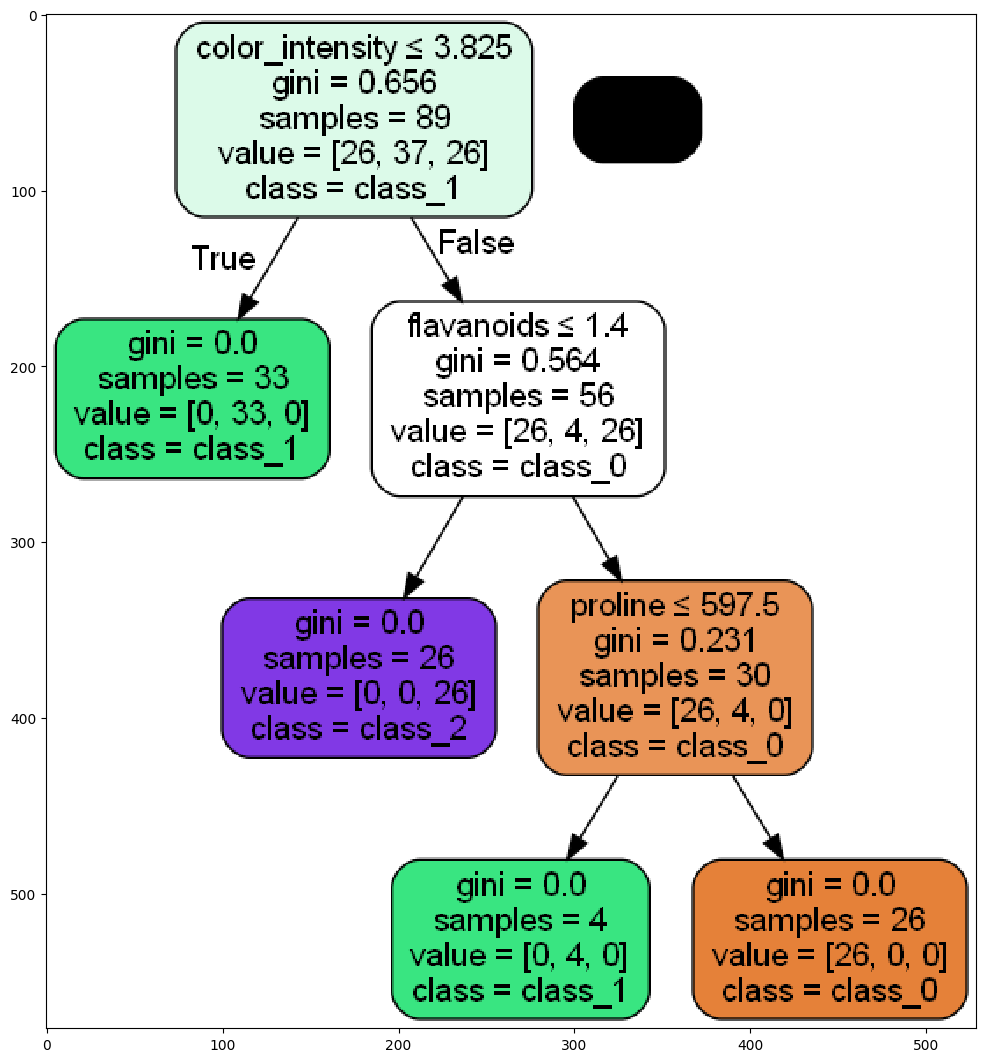

In [285]:
dot_data = StringIO()
filename = "tree.png"
out = tree.export_graphviz(tree_classifier_wine, out_file=dot_data, 
                      filled=True, rounded=True, special_characters=True,
                      feature_names=wine.feature_names, 
                      class_names=[str(target) for target in wine.target_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(12,15))
plt.imshow(img,interpolation='nearest')

### wine 80% train 

In [286]:
tree_classifier_wine = DecisionTreeClassifier()

In [287]:
tree_acc_80_wine, tree_cm_80_wine = train_and_evaluate(tree_classifier_wine, X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine)

In [288]:
print("Results for Wine with 80% of training and testing data:")
print("Decision tree - Accuracy:", tree_acc_80_wine)
print("Decision tree - Confusion matrix:")
print(tree_cm_80_wine)

Results for Wine with 80% of training and testing data:
Decision tree - Accuracy: 0.9444444444444444
Decision tree - Confusion matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


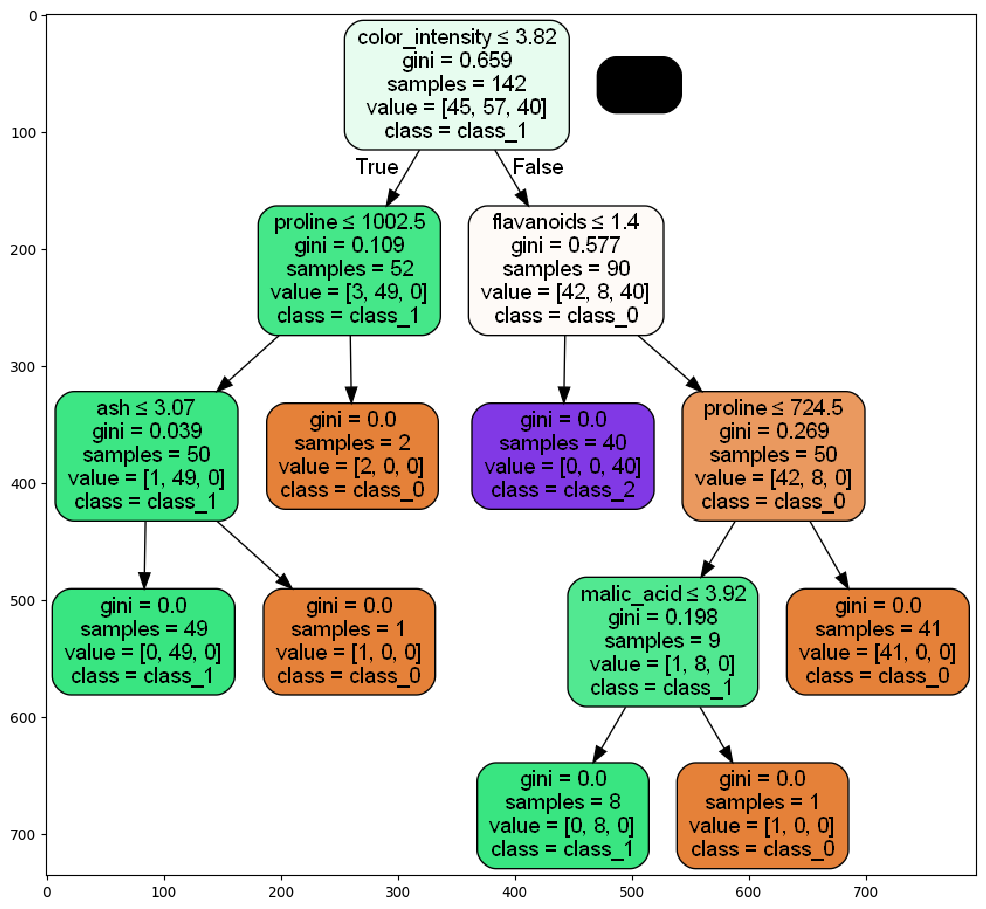

In [289]:
dot_data = StringIO()
filename = "tree.png"
out = tree.export_graphviz(tree_classifier_wine, out_file=dot_data, 
                      filled=True, rounded=True, special_characters=True,
                      feature_names=wine.feature_names, 
                      class_names=[str(target) for target in wine.target_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(12,15))
plt.imshow(img,interpolation='nearest')

### iris 50%

In [290]:
tree_classifier_iris = DecisionTreeClassifier()

In [291]:
tree_acc_50_iris, tree_cm_50_iris = train_and_evaluate(tree_classifier_iris, X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris)

In [292]:
print("Results for Iris with 50% of training and testing data:")
print("Decision tree - Accuracy:", tree_acc_50_iris)
print("Decision tree - Confusion matrix:")
print(tree_cm_50_iris)

Results for Iris with 50% of training and testing data:
Decision tree - Accuracy: 0.9466666666666667
Decision tree - Confusion matrix:
[[29  0  0]
 [ 0 20  3]
 [ 0  1 22]]


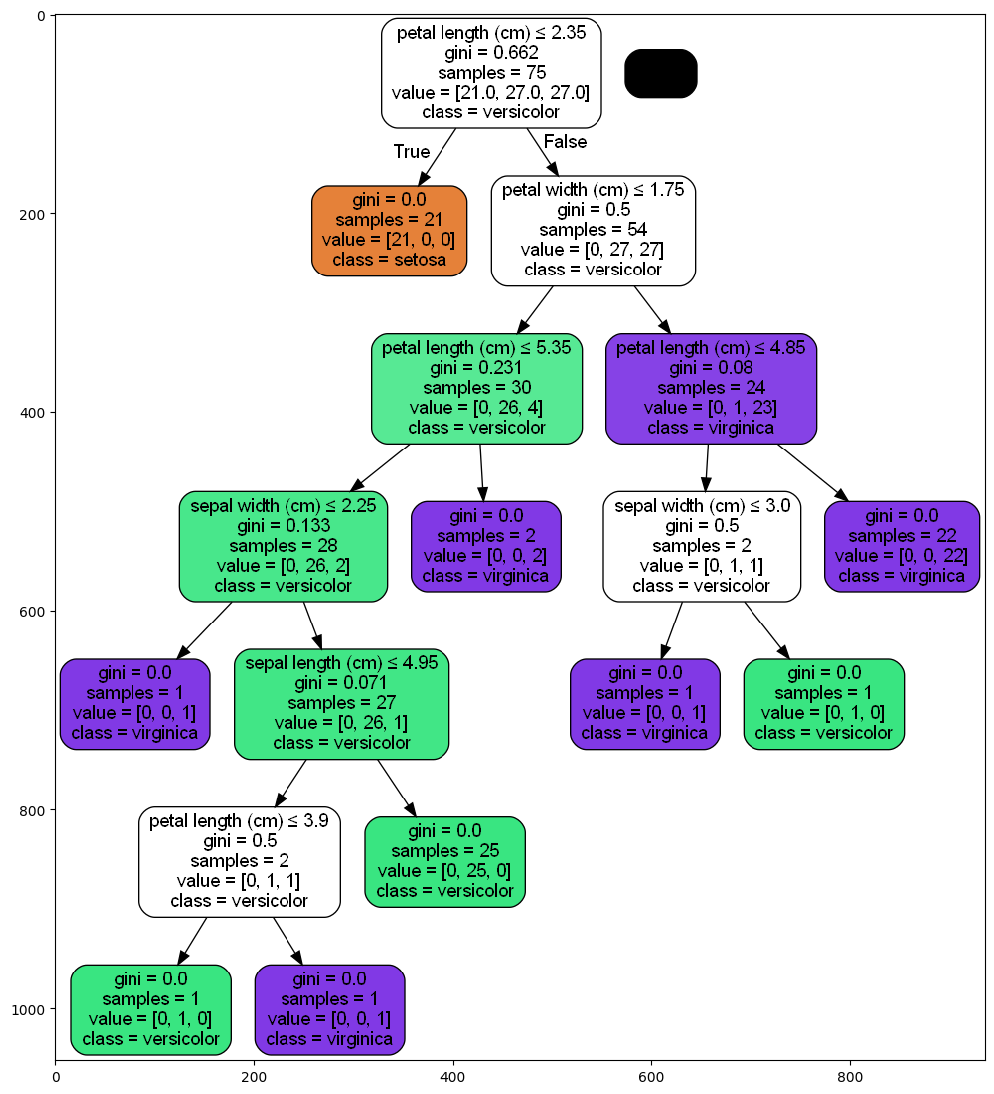

In [293]:
dot_data = StringIO()
filename = "tree.png"
out = tree.export_graphviz(tree_classifier_iris, out_file=dot_data, 
                      filled=True, rounded=True, special_characters=True,
                      feature_names=iris.feature_names, 
                      class_names=[str(target) for target in iris.target_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(12,15))
plt.imshow(img,interpolation='nearest')

### iris 80%

In [294]:
tree_classifier_iris = DecisionTreeClassifier()

In [295]:
tree_acc_80_iris, tree_cm_80_iris = train_and_evaluate(tree_classifier_iris, X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris)

In [296]:
print("Results for Iris with 80% of training and testing data:")
print("Decision tree - Accuracy:", tree_acc_80_iris)
print("Decision tree - Confusion matrix:")
print(tree_cm_80_iris)

Results for Iris with 80% of training and testing data:
Decision tree - Accuracy: 1.0
Decision tree - Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


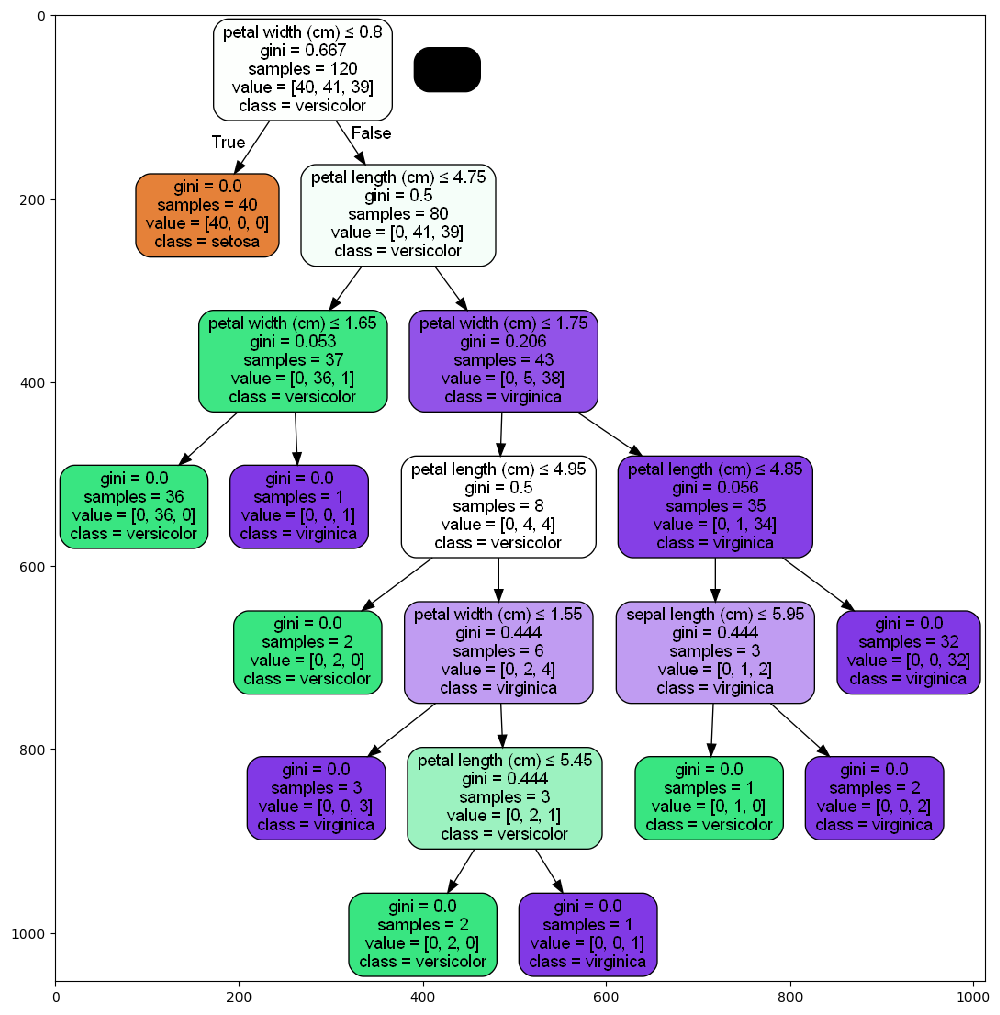

In [297]:
dot_data = StringIO()
filename = "tree.png"
out = tree.export_graphviz(tree_classifier_iris, out_file=dot_data, 
                      filled=True, rounded=True, special_characters=True,
                      feature_names=iris.feature_names, 
                      class_names=[str(target) for target in iris.target_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(12,15))
plt.imshow(img,interpolation='nearest')

## **naïve Bayes**

The assumption of the naive classifier is that the attributes are independent of each other with respect to the concept
are independent of each other with respect to the target concept
and, therefore, they are independent of the target concept:

$$
    P(a_i,a_2,...,a_n|v_j) = \prod_{i} P(a_i|v_j)
$$

The naive Bayesian classifier approach is:

$$
    v_nb = \arg \max_{v_j \in V} P(v_j) \prod_{i} P(a_i|v_j)
$$

The probabilities $P(a_i|v_j)$ are much easier to estimate than $P(a_i,a_2,...a_n)$

### wine 50% 

In [298]:
naive_bayes_classifier_wine = GaussianNB()

In [299]:
nb_acc_50_wine, nb_cm_50_wine = train_and_evaluate(naive_bayes_classifier_wine, X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine)

In [300]:
print("Results for Wine with 50% of training and testing data:")
print("Naive Bayes - Accuracy:", nb_acc_50_wine)
print("Naive Bayes- Confusion matrix:")
print(nb_cm_50_wine)

Results for Wine with 50% of training and testing data:
Naive Bayes - Accuracy: 0.9887640449438202
Naive Bayes- Confusion matrix:
[[32  1  0]
 [ 0 34  0]
 [ 0  0 22]]


### wine 80%

In [301]:
naive_bayes_classifier_wine = GaussianNB()

In [302]:
nb_acc_80_wine, nb_cm_80_wine = train_and_evaluate(naive_bayes_classifier_wine, X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine)

In [303]:
print("Results for Wine with 80% of training and testing data:")
print("Naive Bayes - Accuracy:", nb_acc_80_wine)
print("Naive Bayes- Confusion matrix:")
print(nb_cm_80_wine)

Results for Wine with 80% of training and testing data:
Naive Bayes - Accuracy: 1.0
Naive Bayes- Confusion matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### Iris 50%

In [304]:
naive_bayes_classifier_iris = GaussianNB()

In [305]:
nb_acc_50_iris, nb_cm_50_iris = train_and_evaluate(naive_bayes_classifier_iris, X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris)

In [306]:
print("Results for Iris with 50% of training and testing data:")
print("Naive Bayes - Accuracy:", nb_acc_50_iris)
print("Naive Bayes- Confusion matrix:")
print(nb_cm_50_iris)

Results for Iris with 50% of training and testing data:
Naive Bayes - Accuracy: 0.9866666666666667
Naive Bayes- Confusion matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]


### Iris 80%

In [307]:
naive_bayes_classifier_wine = GaussianNB()

In [308]:
nb_acc_80_iris, nb_cm_80_iris = train_and_evaluate(naive_bayes_classifier_wine, X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris)

In [309]:
print("Results for Iris with 80% of training and testing data:")
print("Naive Bayes - Accuracy:", nb_acc_80_iris)
print("Naive Bayes- Confusion matrix:")
print(nb_cm_80_iris)

Results for Iris with 80% of training and testing data:
Naive Bayes - Accuracy: 1.0
Naive Bayes- Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


##  **k-Nearest neighbors**

- Non-parametric, meaning that it does not make explicit assumptions about the functional form of the data, avoiding mis-modeling the underlying distribution of the data.

- It memorizes the training instances that are later used as "knowledge" for the prediction phase.

- The minimal training phase of KNN is performed at both a memory cost, since we must store a potentially huge dataset, and a computational cost during test time, since the classification of a given observation requires an exhaustion of the entire dataset. 

### Find nearest similar points
The distance between points is found, using one of the distance measures:

- Euclidean distance:

$$
    \sqrt{\sum_{i=1}^{k} (\mathbf{x_i} - \mathbf{y_i})^2}    
$$
- Manhattan distance:
$$
    \sum_{i=1}^{k} |\mathbf{x_i} - \mathbf{y_i}|
$$
- Minkowski Distance
$$
    [\sum_{i=1}^{k} (|\mathbf{x_i} - \mathbf{y_i}|)^4]^{1/4}
$$

1. Calculate the distance
2. Find its nearest neighbors
3. Vote for the labels

**Define the value of K** 
* The number of neighbors (K) is a hyperparameter to be chosen at the time of model construction.
* The number of neighbors (K) is a hyperparameter to be chosen at the time of model construction.
* There is no optimal number of neighbors that fits all types of datasets, each dataset has its own requirements.
* A small number of neighbors will have a low skewness but a high variance, and a large number of neighbors will have a lower variance but a higher skewness.

funtion select the best parameter to k

In [310]:
from sklearn.model_selection import GridSearchCV
def find_best_parameter_k_neighbors (classifier, X_train, X_test, y_train, y_test):
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]} 

    grid_search = GridSearchCV(classifier, param_grid, cv=5)

    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['n_neighbors']

    best_knn = KNeighborsClassifier(n_neighbors=best_k, metric= 'minkowski', p=2)

    best_knn.fit(X_train, y_train)

    y_pred = best_knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    return acc, cm, best_k

### wine 50%

In [311]:
knn = KNeighborsClassifier()

In [312]:
knn_acc_50_wine, knn_cm_50_wine, knn_best_k_wine_50 = find_best_parameter_k_neighbors(knn, X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine)

In [313]:
print("Results for wine with 50% of training and testing data:")
print("Best k:", knn_best_k_wine_50)
print("Knn - Accuracy:", knn_acc_50_wine)
print("Knn - Confusion matrix:")
print(knn_cm_50_wine)

Results for wine with 50% of training and testing data:
Best k: 14
Knn - Accuracy: 0.6629213483146067
Knn - Confusion matrix:
[[27  0  6]
 [ 1 20 13]
 [ 0 10 12]]


### wine 80%

In [314]:
knn = KNeighborsClassifier()

In [315]:
knn_acc_80_wine, knn_cm_80_wine, knn_best_k_wine_80 = find_best_parameter_k_neighbors(knn, X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine)

In [316]:
print("Results for wine with 80% of training and testing data:")
print("Best k:", knn_best_k_wine_80)
print("Knn - Accuracy:", knn_acc_80_wine)
print("Knn - Confusion matrix:")
print(knn_cm_80_wine)

Results for wine with 80% of training and testing data:
Best k: 17
Knn - Accuracy: 0.7777777777777778
Knn - Confusion matrix:
[[14  0  0]
 [ 0  9  5]
 [ 1  2  5]]


### Iris 50%

In [317]:
knn = KNeighborsClassifier()

In [318]:
knn_acc_50_iris, knn_cm_50_iris, knn_best_k_iris_50 = find_best_parameter_k_neighbors(knn, X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris)

In [319]:
print("Results for Iris with 50% of training and testing data:")
print("Best k:", knn_best_k_iris_50)
print("Knn - Accuracy:", knn_acc_50_iris)
print("Knn - Confusion matrix:")
print(knn_cm_50_iris)

Results for Iris with 50% of training and testing data:
Best k: 17
Knn - Accuracy: 0.96
Knn - Confusion matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]]


### iris 80%

In [320]:
knn = KNeighborsClassifier()

In [321]:
knn_acc_80_iris, knn_cm_80_iris, knn_best_k_iris_80 = find_best_parameter_k_neighbors(knn, X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris)

In [322]:
print("Results for Iris with 80% of training and testing data:")
print("Best k:", knn_best_k_iris_80)
print("Knn - Accuracy:", knn_acc_80_iris)
print("Knn - Confusion matrix:")
print(knn_cm_80_iris)

Results for Iris with 80% of training and testing data:
Best k: 3
Knn - Accuracy: 1.0
Knn - Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## **Support Vector Machines (SVM)**

  - Algoritmh based on supervised learning (labeling data)
  - This algoritmh is cable to perform regression and classification linear and non-linear
  - Works very well for small to medium sized complex datasets
  - It can be applied in different ways depending on the data set:
      - Linearly separeble datasets:
          - Hard Margin Classification
          - Soft Margin Classification
      - Non-linearly separable datasets:
          - kernels
  
  Disadvantages:
  - only works with linearly separable dataset
  - is very sensitive to anomalous data
  

In [323]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler

#### **Gasussian Kernel**

In [324]:
def find_best_parameter_gamma_c_ (X_test, X_train, y_test, y_train):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    
    best_params = (0, 0)
    best_acc = 0
    best_cm = None
    
    for C_ in C_range:
        for gamma_ in gamma_range:
            rbf_kernel_svm_clf = Pipeline([
                ("scaler", RobustScaler()),
                ("svm_clf", SVC(kernel="rbf", gamma = gamma_, C =  C_))
            ])

            rbf_kernel_svm_clf.fit(X_train, y_train)

            y_pred = rbf_kernel_svm_clf.predict(X_test)

            acc = accuracy_score(y_test, y_pred)

            if acc > best_acc:
                best_acc = acc
                best_params = (gamma_, C_)
                best_cm = confusion_matrix(y_test, y_pred)
    
    return (best_acc, best_cm, best_params[0], best_params[1])
    

### Wine 50%

In [325]:
svm_acc_50_wine, svm_cm_50_wine, svm_gamma_50_wine, svm_C_50_wine = find_best_parameter_gamma_c_(X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine)

In [326]:
print("Results for wine with 50% of training and testing data:")
print("Best gamma:", svm_gamma_50_wine )
print("Best C_ ", svm_C_50_wine)
print("svm - Accuracy:", svm_acc_50_wine)
print("svm - Confusion matrix:")
print(svm_cm_50_wine)

Results for wine with 50% of training and testing data:
Best gamma: 0.1
Best C_  1.0
svm - Accuracy: 0.9775280898876404
svm - Confusion matrix:
[[26  0  0]
 [ 0 36  1]
 [ 0  1 25]]


### Wine 80%

In [327]:
svm_acc_80_wine, svm_cm_80_wine, svm_gamma_80_wine, svm_C_80_wine = find_best_parameter_gamma_c_(X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine)

In [328]:
print("Results for wine with 80% of training and testing data:")
print("Best gamma:", svm_gamma_80_wine )
print("Best C_ ", svm_C_80_wine)
print("svm - Accuracy:", svm_acc_80_wine)
print("svm - Confusion matrix:")
print(svm_cm_80_wine)

Results for wine with 80% of training and testing data:
Best gamma: 0.1
Best C_  1.0
svm - Accuracy: 0.9647887323943662
svm - Confusion matrix:
[[43  2  0]
 [ 1 55  1]
 [ 0  1 39]]


### Iris 50%

In [329]:
svm_acc_50_iris, svm_cm_50_iris, svm_gamma_50_iris, svm_C_50_iris = find_best_parameter_gamma_c_(X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris)

In [330]:
print("Results for iris with 50% of training and testing data:")
print("Best gamma:", svm_gamma_50_iris )
print("Best C_ ", svm_C_50_iris)
print("svm - Accuracy:", svm_acc_50_iris)
print("svm - Confusion matrix:")
print(svm_cm_50_iris)

Results for iris with 50% of training and testing data:
Best gamma: 0.1
Best C_  10.0
svm - Accuracy: 0.96
svm - Confusion matrix:
[[21  0  0]
 [ 0 24  3]
 [ 0  0 27]]


### Iris 80%

In [331]:
svm_acc_80_iris, svm_cm_80_iris, svm_gamma_80_iris, svm_C_80_iris = find_best_parameter_gamma_c_(X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris)

In [332]:
print("Results for iris with 80% of training and testing data:")
print("Best gamma:", svm_gamma_80_iris )
print("Best C_ ", svm_C_80_iris)
print("svm - Accuracy:", svm_acc_80_iris)
print("svm - Confusion matrix:")
print(svm_cm_80_iris)

Results for iris with 80% of training and testing data:
Best gamma: 0.001
Best C_  100000.0
svm - Accuracy: 0.9666666666666667
svm - Confusion matrix:
[[40  0  0]
 [ 0 39  2]
 [ 0  2 37]]


## **DNN**

In [333]:
def dnn_rbm(X_train, X_test, y_train, y_test):

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # RBM pre-training
    rbm = BernoulliRBM(n_components=64, learning_rate=0.1, n_iter=100)
    rbm.fit(X_train_scaled)
    X_train_rbm = rbm.transform(X_train_scaled)
    X_test_rbm = rbm.transform(X_test_scaled)

    # Build DNN model
    dnn_model = Sequential()
    dnn_model.add(Dense(64, activation='relu', input_shape=(64,)))  # Adjust input shape to match RBM output
    dnn_model.add(Dense(32, activation='relu'))
    dnn_model.add(Dense(16, activation='relu')) 
    dnn_model.add(Dense(3, activation='softmax'))

    # Compile DNN model
    dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train DNN model
    dnn_model.fit(X_train_rbm, y_train, epochs=10, validation_data=(X_test_rbm, y_test))

    # Predictions
    y_pred = dnn_model.predict(X_test_rbm)
    y_pred_classes = y_pred.argmax(axis=-1)

    # Evaluate DNN model
    loss, accuracy = dnn_model.evaluate(X_test_rbm, y_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)

    return accuracy, cm

### Wine 50%

In [334]:
dnn_acc_50_wine, dnn_cm_50_wine = dnn_rbm(X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine)
print('Accuracy:', dnn_acc_50_wine)
print('Dnn - Confusion matriz:\n', dnn_cm_50_wine)

Epoch 1/10


c:\Users\juanq\anaconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.4635 - loss: 1.0886 - val_accuracy: 0.3820 - val_loss: 1.0552
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4457 - loss: 1.0428 - val_accuracy: 0.3820 - val_loss: 1.0151
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4574 - loss: 0.9787 - val_accuracy: 0.4045 - val_loss: 0.9793
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4261 - loss: 0.9452 - val_accuracy: 0.4157 - val_loss: 0.9557
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4344 - loss: 0.9199 - val_accuracy: 0.4045 - val_loss: 0.9313
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4339 - loss: 0.9042 - val_accuracy: 0.4045 - val_loss: 0.9159
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4066 - loss: 0.8908 - val_accuracy: 0.4045 - val_loss: 0.9028
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6198 - loss: 0.8568 - val_accuracy: 0.6404 - val_loss: 0.8936
Epoch 9/10

### Wine 80%

In [335]:
dnn_acc_80_wine, dnn_cm_80_wine = dnn_rbm(X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine)
print('Accuracy:', dnn_acc_80_wine)
print('Dnn - Confusion matriz:\n', dnn_cm_80_wine)

Epoch 1/10


c:\Users\juanq\anaconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.4838 - loss: 0.9813 - val_accuracy: 0.6111 - val_loss: 0.9643
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5956 - loss: 0.9082 - val_accuracy: 0.6111 - val_loss: 0.9344
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5943 - loss: 0.8929 - val_accuracy: 0.6111 - val_loss: 0.9207
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6007 - loss: 0.8754 - val_accuracy: 0.6944 - val_loss: 0.9175
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6404 - loss: 0.8730 - val_accuracy: 0.6944 - val_loss: 0.9195
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6377 - loss: 0.8438 - val_accuracy: 0.6111 - val_loss: 0.8896
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6073 - loss: 0.8665 - val_accuracy: 0.6111 - val_loss: 0.8779
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5739 - loss: 0.8384 - val_accuracy: 0.6944 - val_loss: 0.8725
Epoch 9/10


### Iris 50%

In [336]:
dnn_acc_50_iris, dnn_cm_50_iris = dnn_rbm(X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris)
print('Accuracy:', dnn_acc_50_iris)
print('Dnn - Confusion matriz:\n', dnn_cm_50_iris)

Epoch 1/10


c:\Users\juanq\anaconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.3613 - loss: 1.0581 - val_accuracy: 0.5600 - val_loss: 0.9813
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4900 - loss: 1.0393 - val_accuracy: 0.5600 - val_loss: 0.9619
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4705 - loss: 1.0123 - val_accuracy: 0.5600 - val_loss: 0.9502
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4939 - loss: 0.9976 - val_accuracy: 0.5600 - val_loss: 0.9374
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4705 - loss: 0.9751 - val_accuracy: 0.5600 - val_loss: 0.9305
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4783 - loss: 0.9702 - val_accuracy: 0.5600 - val_loss: 0.9206
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4822 - loss: 0.9631 - val_accuracy: 0.5600 - val_loss: 0.9068
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4666 - loss: 0.9645 - val_accuracy: 0.5600 - val_loss: 0.8931
Epoch 9/10

### Iris 80%

In [337]:
dnn_acc_80_iris, dnn_cm_80_iris = dnn_rbm(X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris)
print('Accuracy:', dnn_acc_80_iris)
print('Dnn - Confusion matriz:\n', dnn_cm_80_iris)

Epoch 1/10


c:\Users\juanq\anaconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.0148 - loss: 1.2481 - val_accuracy: 0.0667 - val_loss: 1.0954
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3469 - loss: 1.0686 - val_accuracy: 0.7000 - val_loss: 0.9911
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6363 - loss: 0.9819 - val_accuracy: 0.7000 - val_loss: 0.9436
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6560 - loss: 0.9304 - val_accuracy: 0.7000 - val_loss: 0.9147
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6404 - loss: 0.9006 - val_accuracy: 0.7000 - val_loss: 0.8860
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6581 - loss: 0.8707 - val_accuracy: 0.7000 - val_loss: 0.8579
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6571 - loss: 0.8651 - val_accuracy: 0.7000 - val_loss: 0.8321
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6540 - loss: 0.8196 - val_accuracy: 0.7000 - val_loss: 0.8099
Epoch 9/10


## **CNN**

In [338]:
##implment cnn
def cnn(X_train,X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train) 
    X_test_scaled = scaler.transform(X_test)

    X_train_reshaped = np.expand_dims(X_train_scaled, axis=2)
    X_test_reshaped = np.expand_dims(X_test_scaled, axis= 2)

    model = Sequential()

    model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

    # Predictions
    y_pred = model.predict(X_test_reshaped)
    y_pred_classes = y_pred.argmax(axis=-1)
    

    loss, accuracy = model.evaluate(X_test_reshaped, y_test)
    cm = confusion_matrix(y_test, y_pred_classes)

    return accuracy, cm

### Wine 50%

In [339]:
cnn_acc_50_wine, cnn_cm_50_wine = cnn(X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine)
print('Accuracy:', cnn_acc_50_wine)
print('Cnn - Confusion matriz:\n', cnn_cm_50_wine)

Epoch 1/10


c:\Users\juanq\anaconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.4454 - loss: 1.0598 - val_accuracy: 0.8202 - val_loss: 0.9423
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7426 - loss: 0.9174 - val_accuracy: 0.8652 - val_loss: 0.8537
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9368 - loss: 0.7860 - val_accuracy: 0.8652 - val_loss: 0.7671
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9541 - loss: 0.6790 - val_accuracy: 0.8764 - val_loss: 0.6904
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9524 - loss: 0.5980 - val_accuracy: 0.8539 - val_loss: 0.6239
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9389 - loss: 0.5299 - val_accuracy: 0.8764 - val_loss: 0.5634
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9389 - loss: 0.4565 - val_accuracy: 0.8764 - val_loss: 0.5120
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9311 - loss: 0.3926 - val_accuracy: 0.8876 - val_loss: 0.4669
Epoch 9/10

### Wine 80%

In [340]:
cnn_acc_80_wine, cnn_cm_80_wine = cnn(X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine)
print('Accuracy:', cnn_acc_80_wine)
print('Cnn - Confusion matriz:\n', cnn_cm_80_wine)

Epoch 1/10


c:\Users\juanq\anaconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4372 - loss: 1.0551 - val_accuracy: 0.8611 - val_loss: 0.8816
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8939 - loss: 0.8204 - val_accuracy: 0.8889 - val_loss: 0.7418
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9010 - loss: 0.6620 - val_accuracy: 0.9167 - val_loss: 0.5898
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8809 - loss: 0.5524 - val_accuracy: 0.9444 - val_loss: 0.4435
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9188 - loss: 0.4385 - val_accuracy: 0.9444 - val_loss: 0.3357
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9116 - loss: 0.3653 - val_accuracy: 0.9444 - val_loss: 0.2509
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9338 - loss: 0.2751 - val_accuracy: 0.9444 - val_loss: 0.1964
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9177 - loss: 0.2509 - val_accuracy: 0.9444 - val_loss: 0.1690
Epoch 9/10


### Iris 50%

In [341]:
cnn_acc_50_iris, cnn_cm_50_iris = cnn(X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris)
print('Accuracy:', cnn_acc_50_iris)
print('Cnn - Confusion matriz:\n', cnn_cm_50_iris)

Epoch 1/10


c:\Users\juanq\anaconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.3202 - loss: 1.0937 - val_accuracy: 0.4000 - val_loss: 1.0572
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5539 - loss: 1.0368 - val_accuracy: 0.6933 - val_loss: 0.9906
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7005 - loss: 0.9826 - val_accuracy: 0.6933 - val_loss: 0.9330
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6314 - loss: 0.9392 - val_accuracy: 0.7067 - val_loss: 0.8808
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6509 - loss: 0.8857 - val_accuracy: 0.7200 - val_loss: 0.8322
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6314 - loss: 0.8430 - val_accuracy: 0.7200 - val_loss: 0.7866
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6615 - loss: 0.8143 - val_accuracy: 0.7200 - val_loss: 0.7448
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6810 - loss: 0.7549 - val_accuracy: 0.7333 - val_loss: 0.7065
Epoch 9/10

### Iris 80%

In [342]:
cnn_acc_80_iris, cnn_cm_80_iris = cnn(X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris)
print('Accuracy:', cnn_acc_80_iris)
print('Cnn - Confusion matriz:\n', cnn_cm_80_iris)

Epoch 1/10


c:\Users\juanq\anaconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.3104 - loss: 1.0700 - val_accuracy: 0.3667 - val_loss: 1.0186
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4117 - loss: 1.0053 - val_accuracy: 0.7000 - val_loss: 0.9460
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6883 - loss: 0.9260 - val_accuracy: 0.7333 - val_loss: 0.8782
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6835 - loss: 0.8716 - val_accuracy: 0.7333 - val_loss: 0.8147
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6985 - loss: 0.8032 - val_accuracy: 0.7667 - val_loss: 0.7535
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7133 - loss: 0.7473 - val_accuracy: 0.8000 - val_loss: 0.6972
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7373 - loss: 0.7186 - val_accuracy: 0.8333 - val_loss: 0.6443
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7406 - loss: 0.6712 - val_accuracy: 0.8667 - val_loss: 0.5958
Epoch 9/10

## **PNN**

In [408]:
#Probabilistic-neural-network (vdevmcitylp) : https://github.com/vdevmcitylp/probabilistic-neural-network
import numpy as np


from sklearn.metrics import accuracy_score, \
							confusion_matrix, \
							precision_score, \
							recall_score


# Helper function that combines the pattern layer and summation layer (Función RBF (Radial Basis Function):)
def rbf(centre, x, sigma):
	
	centre = centre.reshape(1, -1)

	temp = -np.sum((centre - x) ** 2, axis = 1)
	temp = temp / (2 * sigma * sigma)
	temp = np.exp(temp)
	gaussian = np.sum(temp)
	
	return gaussian


#This function takes the training data and labels and returns a list of subsets of data, where each subset contains data of a particular class.
def subset_by_class(data, labels):

	x_train_subsets = []
	
	for l in labels:
		indices = np.where(data['y_train'] == l)
		x_train_subsets.append(data['x_train'][indices, :])

	return x_train_subsets


def PNN(data, sigma = 10):

	num_testset = data['x_test'].shape[0]
	labels = np.unique(data['y_train'])
	num_class = len(labels)

	# Splits the training set into subsets where each subset contains data points from a particular class	
	x_train_subsets = subset_by_class(data, labels)	

	# Variable for storing the summation layer values from each class
	summation_layer = np.zeros(num_class)
	
	# Variable for storing the predictions for each test data point
	predictions = np.zeros(num_testset)

	for i, test_point in enumerate(data['x_test']):
		
		for j, subset in enumerate(x_train_subsets):
			# Calculate summation layer
			summation_layer[j] = np.sum(
				rbf(test_point, subset[0], sigma)) / subset[0].shape[0] 
		
		# The index having the largest value in the summation_layer is stored as the prediction
		predictions[i] = np.argmax(summation_layer)
	
	return predictions

def get_metrics(y_test, predictions):
	cm = confusion_matrix(y_test, predictions)
	acc = accuracy_score(y_test, predictions)
	return cm, acc

def print_metrics(y_test, predictions):
	print('Confusion Matrix')
	print(confusion_matrix(y_test, predictions))
	print('Accuracy: {}'.format(accuracy_score(y_test, predictions)))
	print('Precision: {}'.format(precision_score(y_test, predictions, average = 'micro')))
	print('Recall: {}'.format(recall_score(y_test, predictions, average = 'micro')))
	

### wine 50%

In [409]:
data = {'x_train': X_train_50_wine, 'y_train': y_train_50_wine, 'x_test': X_test_50_wine, 'y_test': y_test_50_wine}
pnn_sigma_50_wine = 15
predictions = PNN(data, sigma = pnn_sigma_50_wine)
print_metrics(data['y_test'], predictions)
pnn_cm_50_wine, pnn_acc_50_wine = get_metrics(data['y_test'], predictions) 

Confusion Matrix
[[27  2  4]
 [ 1 23 10]
 [ 1  8 13]]
Accuracy: 0.7078651685393258
Precision: 0.7078651685393258
Recall: 0.7078651685393258


### wine 80%

In [410]:
data = {'x_train': X_train_80_wine, 'y_train': y_train_80_wine, 'x_test': X_test_80_wine, 'y_test': y_test_80_wine}
pnn_sigma_80_wine = 110
predictions = PNN(data, sigma=pnn_sigma_80_wine)
print_metrics(data['y_test'], predictions)
pnn_cm_80_wine, pnn_acc_80_wine = get_metrics(data['y_test'], predictions) 

Confusion Matrix
[[14  0  0]
 [ 0  9  5]
 [ 0  2  6]]
Accuracy: 0.8055555555555556
Precision: 0.8055555555555556
Recall: 0.8055555555555556


### Iris 50%

In [411]:
data = {'x_train': X_train_50_iris, 'y_train': y_train_50_iris, 'x_test': X_test_50_iris, 'y_test': y_test_50_iris}
pnn_sigma_50_iris = 15
predictions = PNN(data, sigma=pnn_sigma_50_iris)
print_metrics(data['y_test'], predictions)
pnn_cm_50_iris, pnn_acc_50_iris = get_metrics(data['y_test'], predictions) 

Confusion Matrix
[[29  0  0]
 [ 0 21  2]
 [ 0  2 21]]
Accuracy: 0.9466666666666667
Precision: 0.9466666666666667
Recall: 0.9466666666666667


### Iris 80%

In [412]:
data = {'x_train': X_train_80_iris, 'y_train': y_train_80_iris, 'x_test': X_test_80_iris, 'y_test': y_test_80_iris}
pnn_sigma_80_iris = 15
predictions = PNN(data, sigma=pnn_sigma_50_iris)
print_metrics(data['y_test'], predictions)
pnn_cm_80_iris, pnn_acc_80_iris = get_metrics(data['y_test'], predictions) 

Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9666666666666667


### Dataset: Wine Training: 50% Testing: 50%

In [413]:
acc = [tree_acc_50_wine, nb_acc_50_wine, knn_acc_50_wine, svm_acc_50_wine, dnn_acc_50_wine, cnn_acc_50_wine, pnn_acc_50_wine]
models = ['Decision tree', 'Naive Bayes', 'K-NN', 'SVM', 'DNN', 'CNN', 'PNN']
best_ks = ['', '', knn_best_k_wine_50, f'gamma: {svm_gamma_50_wine} C: {svm_C_50_wine}', '', '', f'sigma: {pnn_sigma_50_wine}']
data = {
    'Classifier': models,
    'best parameters': best_ks,
    'Accuracy': acc
}

table_df1 = pd.DataFrame(data)

table_df1

,Classifier,best parameters,Accuracy
0,Decision tree,,0.910112
1,Naive Bayes,,0.988764
2,K-NN,14,0.662921
3,SVM,gamma: 0.1 C: 1.0,0.977528
4,DNN,,0.617977
5,CNN,,0.876405
6,PNN,sigma: 15,0.707865


### Dataset: Wine Training: 80% Testing: 20%

In [414]:
acc = [tree_acc_80_wine, nb_acc_80_wine, knn_acc_80_wine, svm_acc_80_wine, dnn_acc_80_wine, cnn_acc_80_wine, pnn_acc_80_wine]
models = ['Decision tree', 'Naive Bayes', 'K-NN', 'SVM', 'DNN', 'CNN', 'PNN']
best_ks = ['', '', knn_best_k_wine_80, f'gamma: {svm_gamma_80_wine} C: {svm_C_80_wine}', '', '', f'sigma {pnn_sigma_80_wine}']
data = {
    'Classifier': models,
    'best parameters': best_ks,
    'Accuracy': acc
}

table_df2 = pd.DataFrame(data)

table_df2

,Classifier,best parameters,Accuracy
0,Decision tree,,0.944444
1,Naive Bayes,,1.000000
2,K-NN,17,0.777778
3,SVM,gamma: 0.1 C: 1.0,0.964789
4,DNN,,0.694444
5,CNN,,0.944444
6,PNN,sigma 110,0.805556


### Dataset: Iris Training: 50% Testing: 50%

In [415]:
acc = [tree_acc_50_iris, nb_acc_50_iris, knn_acc_50_iris, svm_acc_50_iris, dnn_acc_50_iris, cnn_acc_50_iris, pnn_acc_50_iris]
models = ['Decision tree', 'Naive Bayes', 'K-NN', 'SVM', 'DNN', 'CNN', 'PNN']
best_ks = ['', '', knn_best_k_iris_50, f'gamma: {svm_gamma_50_iris} C: {svm_C_50_iris}', '', '', f'sigma: {pnn_sigma_50_iris}']
data = {
    'Classifier': models,
    'best parameters': best_ks,
    'Accuracy': acc
}

table_df3 = pd.DataFrame(data)

table_df3

,Classifier,best parameters,Accuracy
0,Decision tree,,0.946667
1,Naive Bayes,,0.986667
2,K-NN,17,0.960000
3,SVM,gamma: 0.1 C: 10.0,0.960000
4,DNN,,0.560000
5,CNN,,0.733333
6,PNN,sigma: 15,0.946667


### Dataset: Iris Training: 80% Testing: 20%

In [416]:
acc = [tree_acc_80_iris, nb_acc_80_iris, knn_acc_80_iris, svm_acc_80_iris, dnn_acc_80_iris, cnn_acc_80_iris, pnn_acc_80_iris]
models = ['Decision tree', 'Naive Bayes', 'K-NN', 'SVM', 'DNN', 'CNN', 'PNN']
best_ks = ['', '', knn_best_k_iris_80, f'gamma: {svm_gamma_80_iris} C: {svm_C_80_iris}', '', '', f'sigma: {pnn_sigma_80_iris}']
data = {
    'Classifier': models,
    'best parameters': best_ks,
    'Accuracy': acc
}

table_df4 = pd.DataFrame(data)

table_df4

,Classifier,best parameters,Accuracy
0,Decision tree,,1.000000
1,Naive Bayes,,1.000000
2,K-NN,3,1.000000
3,SVM,gamma: 0.001 C: 100000.0,0.966667
4,DNN,,0.700000
5,CNN,,0.900000
6,PNN,sigma: 15,0.966667


## **Conclusions**

In the case of the Wine data set (50% and 50%), the best classifier is Naive Bayes with 98% accuracy; for (80% and 20%), Naive Bayes is also the best with 1 accuracy.

While for Iris (50% and 50%), the best is Naive Bayes with 98%, and for (80% and 20%) there is a tie with the three classifiers with 100%.

## References


- Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.
- Aeberhard,Stefan and Forina,M.. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.
- Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. http://jmlr.org/papers/v12/pedregosa11a.html
- Specht, D. F. (1990). Probabilistic neural networks. Neural networks, 3(1), 109-118.
- Probabilistic-neural-network (vdevmcitylp
)https://github.com/vdevmcitylp/probabilistic-neural-network